In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "gdrive/My Drive/"

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
# Step 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Step 2
df = pd.read_csv('Deep Learning/Datasets/DATA/cancer_classification.csv')

In [5]:
# Step 3
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Step 4
df.info()

In [ ]:
# Step 5
df.describe()

In [ ]:
# Step 6
df.describe().T

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


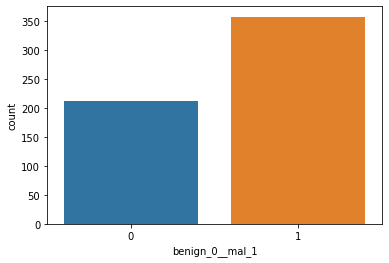

In [7]:
# Step 7
sns.countplot(df['benign_0__mal_1'])

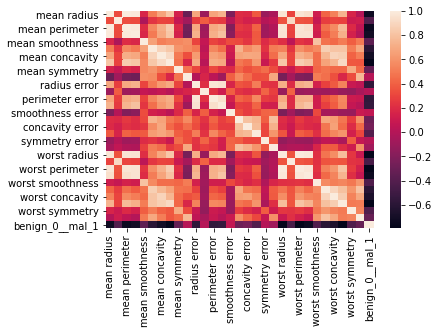

In [10]:
# Step 8
sns.heatmap(df.corr())

In [ ]:
# Step 9
df.corr()['benign_0_mal_1']#.sort_values()

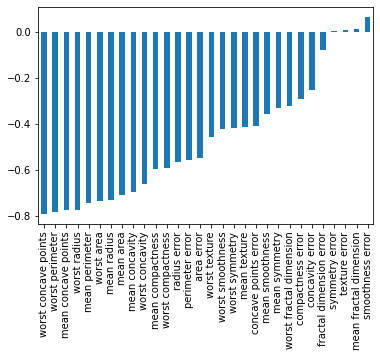

In [12]:
# Step 10
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.bar()

In [13]:
# Step 11
X = df.drop('benign_0__mal_1', 1).values
y= df['benign_0__mal_1'].values

In [14]:
# Step 12
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
# Step 13
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Construction Tools
# Step 14
from tensorflow.keras.models import Sequential    #Sequential helps stack layers together
from tensorflow.keras.layers import Dense         # Dense is a type of layer where the outputs of each node is an input to the next layer(node)

In [17]:
# Step 15a

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Step 16a
model.fit(X_train, y_train, epochs=600, verbose=1, validation_data=(X_test, y_test))

In [ ]:
# Step 17a
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Step 16b
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=25)

checkpoint = ModelCheckpoint(
                             filepath="/Colab Notebooks/DSC_Classes/cancer_weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True
                             )
# mode='max' for likes of accuracy as > is better but 'min' for mae as small err is better

In [ ]:
model.fit(x = X_train,
          y = y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

In [ ]:
# Step 17b
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Step 16c
checkpoint = ModelCheckpoint(filepath="/Colab Notebooks/DSC_Classes/cancer_weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                            
                             monitor='val_loss', mode='min', save_best_only=True)
# saves best model as you fit your model,it replaces the current one if another beats it
# named as saved = weights.epoch_no-err_at_this_point

model.fit(x = X_train,
          y = y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop, checkpoint]
         )

In [ ]:
# Step 17c
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Step 15b

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))   #probability of 0.5 of putting off a neuron at random anytime
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Step 16d
checkpoint = ModelCheckpoint(filepath="/Colab Notebooks/DSC_Classes/cancer_weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                            
                             monitor='val_loss', mode='min', save_best_only=True)
# saves best model as you fit your model,it replaces the current one if another beats it
# named as saved = weights.epoch_no-err_at_this_point

model.fit(x = X_train,
          y = y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop, checkpoint]
         )

# epochs will be bigger now because of dropout

In [ ]:
# Step 17d
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Step 18
# Prediction... not model.predict but model.predict_classes
pred = model.predict_classes(X_test)

In [ ]:
# Step 19
# METRICS

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(pred, y_test)

In [ ]:
print(classification_report(pred, y_test))

In [ ]:
# SAVING YOUR MODEL
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/DSC_Classes/breast_cancer.h5')